 # <span style='color:green'>  1.	Data Wrangling  </span>

<div class="alert-success">
● Importing Libraries and Data:
</div>

In [1]:
import datetime
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('salsedataset1.csv',encoding='ISO-8859-1', sep=';')
df.head()

,Date,Time,State,Group,Unit,Sales
0,10/1/2020,Morning,WA,Kids,8,20000
1,10/1/2020,Morning,WA,Men,8,20000
2,10/1/2020,Morning,WA,Women,4,10000
3,10/1/2020,Morning,WA,Seniors,15,37500
4,10/1/2020,Afternoon,WA,Kids,3,7500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [4]:
df

,Date,Time,State,Group,Unit,Sales
0,10/1/2020,Morning,WA,Kids,8,20000
1,10/1/2020,Morning,WA,Men,8,20000
2,10/1/2020,Morning,WA,Women,4,10000
3,10/1/2020,Morning,WA,Seniors,15,37500
4,10/1/2020,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,12/30/2020,Afternoon,TAS,Seniors,14,35000
7556,12/30/2020,Evening,TAS,Kids,15,37500
7557,12/30/2020,Evening,TAS,Men,15,37500
7558,12/30/2020,Evening,TAS,Women,11,27500


In [5]:
df.columns

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')

<div class="alert-success">
●	Ensure that the data is clean and that there is no missing or incorrect data: 
</div>

In [6]:
df.isna()
# returns TRUE where it detects a missing value

,Date,Time,State,Group,Unit,Sales
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
7555,False,False,False,False,False,False
7556,False,False,False,False,False,False
7557,False,False,False,False,False,False
7558,False,False,False,False,False,False


In [7]:
df.notna()
# returns TRUE, if the data is free from missing

,Date,Time,State,Group,Unit,Sales
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
7555,True,True,True,True,True,True
7556,True,True,True,True,True,True
7557,True,True,True,True,True,True
7558,True,True,True,True,True,True


In [8]:
print(df.isnull().sum())

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


 # <span style='color:green'>  2.	Data Analysis   </span>

<div class="alert-success">
● Descriptive Statistical Analysis:
</div>

In [9]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [10]:
df.Sales.mean()

45013.5582010582

In [11]:
df.Unit.mean()

18.00542328042328

In [12]:
df.Sales.median()

35000.0

In [13]:
df.Unit.median()

14.0

In [14]:
df.Sales.mode()

0    22500
Name: Sales, dtype: int64

In [15]:
df.Unit.mode()

0    9
Name: Unit, dtype: int64

In [16]:
df.Sales.std()

32253.506943966317

In [17]:
df.Unit.std()

12.901402777586458

<div class="alert-success">
● GroupBy:
</div>

In [18]:
group_sales =df.groupby('Group')['Sales'].sum()
print(group_sales)

# Determine which group is generating the highest sales, and which group is generating the lowest sales.
highest_group_sales = group_sales.idxmax()
lowest_group_sales = group_sales.idxmin()
print("\nGroup Generating Highest Sales:", highest_group_sales)
print("Group Generating Lowest Sales:", lowest_group_sales)

Group
 Kids       85072500
 Men        85750000
 Seniors    84037500
 Women      85442500
Name: Sales, dtype: int64

Group Generating Highest Sales:  Men
Group Generating Lowest Sales:  Seniors


In [19]:
state_sales = df.groupby('State')['Sales'].sum()
print(state_sales)

# Determine which state is generating the highest sales, and which state is generating the lowest sales.
highest_state_sales = state_sales.idxmax()
lowest_state_sales = state_sales.idxmin()
print("\nState Generating Highest Sales:", highest_state_sales)
print("State Generating Lowest Sales:", lowest_state_sales)

State
 NSW     74970000
 NT      22580000
 QLD     33417500
 SA      58857500
 TAS     22760000
 VIC    105565000
 WA      22152500
Name: Sales, dtype: int64

State Generating Highest Sales:  VIC
State Generating Lowest Sales:  WA


<div class="alert-success">
● Share recommendation on the usage of the groupby() function:
</div>

In [20]:
group_unit= df.groupby('Group')['Unit'].sum()
print(group_unit)

# Determine which group is generating the highest sales, and which state is generating the lowest sales.
highest_group_unit = group_unit.idxmax()
lowest_group_unit = group_unit.idxmin()
print("\nGroup Generating Highest Units:", highest_group_unit)
print("Group Generating Lowest Units:", lowest_group_unit)

Group
 Kids       34029
 Men        34300
 Seniors    33615
 Women      34177
Name: Unit, dtype: int64

Group Generating Highest Units:  Men
Group Generating Lowest Units:  Seniors


In [21]:
time_sales= df.groupby('Time')['Sales'].sum()
print(time_sales)

# Determine which state is generating the highest sales, and which state is generating the lowest sales.
highest_time_sales = time_sales.idxmax()
lowest_time_sales = time_sales.idxmin()
print("\nTime Generating Highest Sales:", highest_time_sales)
print("Time Generating Lowest Sales:", lowest_time_sales)

Time
 Afternoon    114007500
 Evening      112087500
 Morning      114207500
Name: Sales, dtype: int64

Time Generating Highest Sales:  Morning
Time Generating Lowest Sales:  Evening


<div class="alert-success">
● Generate Daily, Weekly, Monthly, and Quarterly Reports:
</div>

In [22]:
df['Date'] = pd.to_datetime(df['Date'])  
df.set_index('Date', inplace=True)

daily_report= df.resample('D')['Sales'].sum()

weekly_report = df.resample('W')['Sales'].sum()

monthly_report = df.resample('M')['Sales'].sum()

quarterly_report = df.resample('Q')['Sales'].sum()


print("\nDaily Report:")
print(daily_report.head())

print("\nWeekly Report:")
print(weekly_report.head())

print("\nMonthly Report:")
print(monthly_report.head())

print("\nQuarterly Report:")
print(quarterly_report.head())


Daily Report:
Date
2020-10-01    3720000
2020-10-02    3715000
2020-10-03    3890000
2020-10-04    3720000
2020-10-05    3862500
Freq: D, Name: Sales, dtype: int64

Weekly Report:
Date
2020-10-04    15045000
2020-10-11    27002500
2020-10-18    26640000
2020-10-25    26815000
2020-11-01    21807500
Freq: W-SUN, Name: Sales, dtype: int64

Monthly Report:
Date
2020-10-31    114290000
2020-11-30     90682500
2020-12-31    135330000
Freq: M, Name: Sales, dtype: int64

Quarterly Report:
Date
2020-12-31    340302500
Freq: Q-DEC, Name: Sales, dtype: int64


<div class="alert-success">
● Data Normalization:
</div>

In [23]:
normlize= ['Sales','Unit']
scalar = MinMaxScaler()
df[normlize] = scalar.fit_transform(df[normlize])

In [24]:
df

,Time,State,Group,Unit,Sales
Date,,,,,
2020-10-01,Morning,WA,Kids,0.095238,0.095238
2020-10-01,Morning,WA,Men,0.095238,0.095238
2020-10-01,Morning,WA,Women,0.031746,0.031746
2020-10-01,Morning,WA,Seniors,0.206349,0.206349
2020-10-01,Afternoon,WA,Kids,0.015873,0.015873
...,...,...,...,...,...
2020-12-30,Afternoon,TAS,Seniors,0.190476,0.190476
2020-12-30,Evening,TAS,Kids,0.206349,0.206349
2020-12-30,Evening,TAS,Men,0.206349,0.206349


 # <span style='color:green'>  3.	Data Visualization  </span>

<div class="alert-success">
 State-wise sales analysis for different groups (kids, women, men, and seniors):
</div>

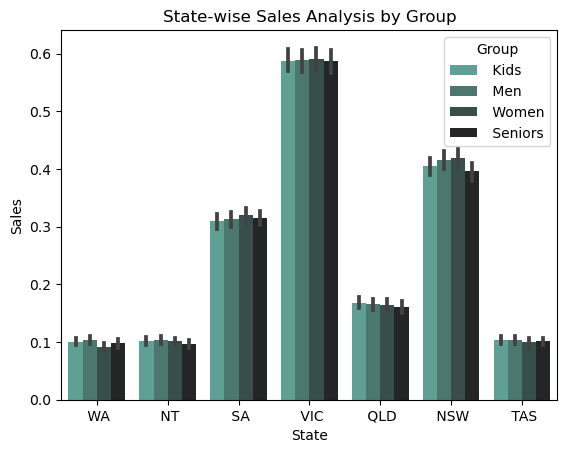

In [25]:
sns.barplot(x='State', y='Sales' ,hue='Group', data=df, palette='dark:#5A9_r')
plt.title('State-wise Sales Analysis by Group')
plt.xlabel('State')
plt.ylabel('Sales')
plt.legend(title='Group')
plt.show()

<div class="alert-success">
Group-wise sales analysis (kids, women, men, and seniors) across different states:
</div>

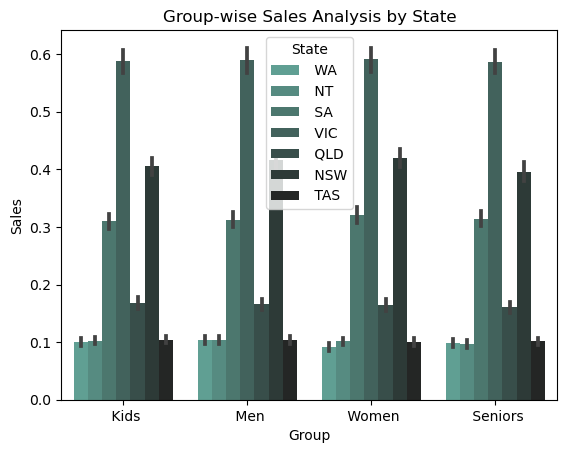

In [26]:
sns.barplot(x='Group', y='Sales' ,hue='State', data=df, palette='dark:#5A9_r')
plt.title('Group-wise Sales Analysis by State')
plt.xlabel('Group')
plt.ylabel('Sales')
plt.legend(title='State')
plt.show()

<div class="alert-success">
Time-of-the-day analysis:
</div>

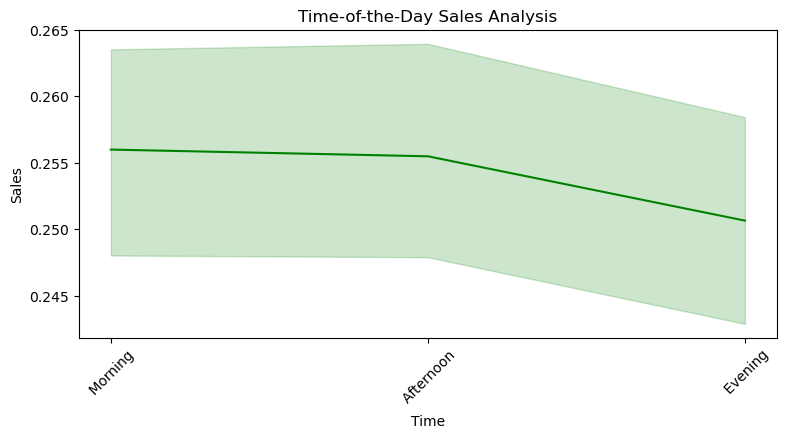

In [27]:
plt.figure(figsize=(9, 4))
sns.lineplot(data=df, x='Time', y='Sales', color='green')
plt.title('Time-of-the-Day Sales Analysis')
plt.xticks(rotation=45)
plt.show()

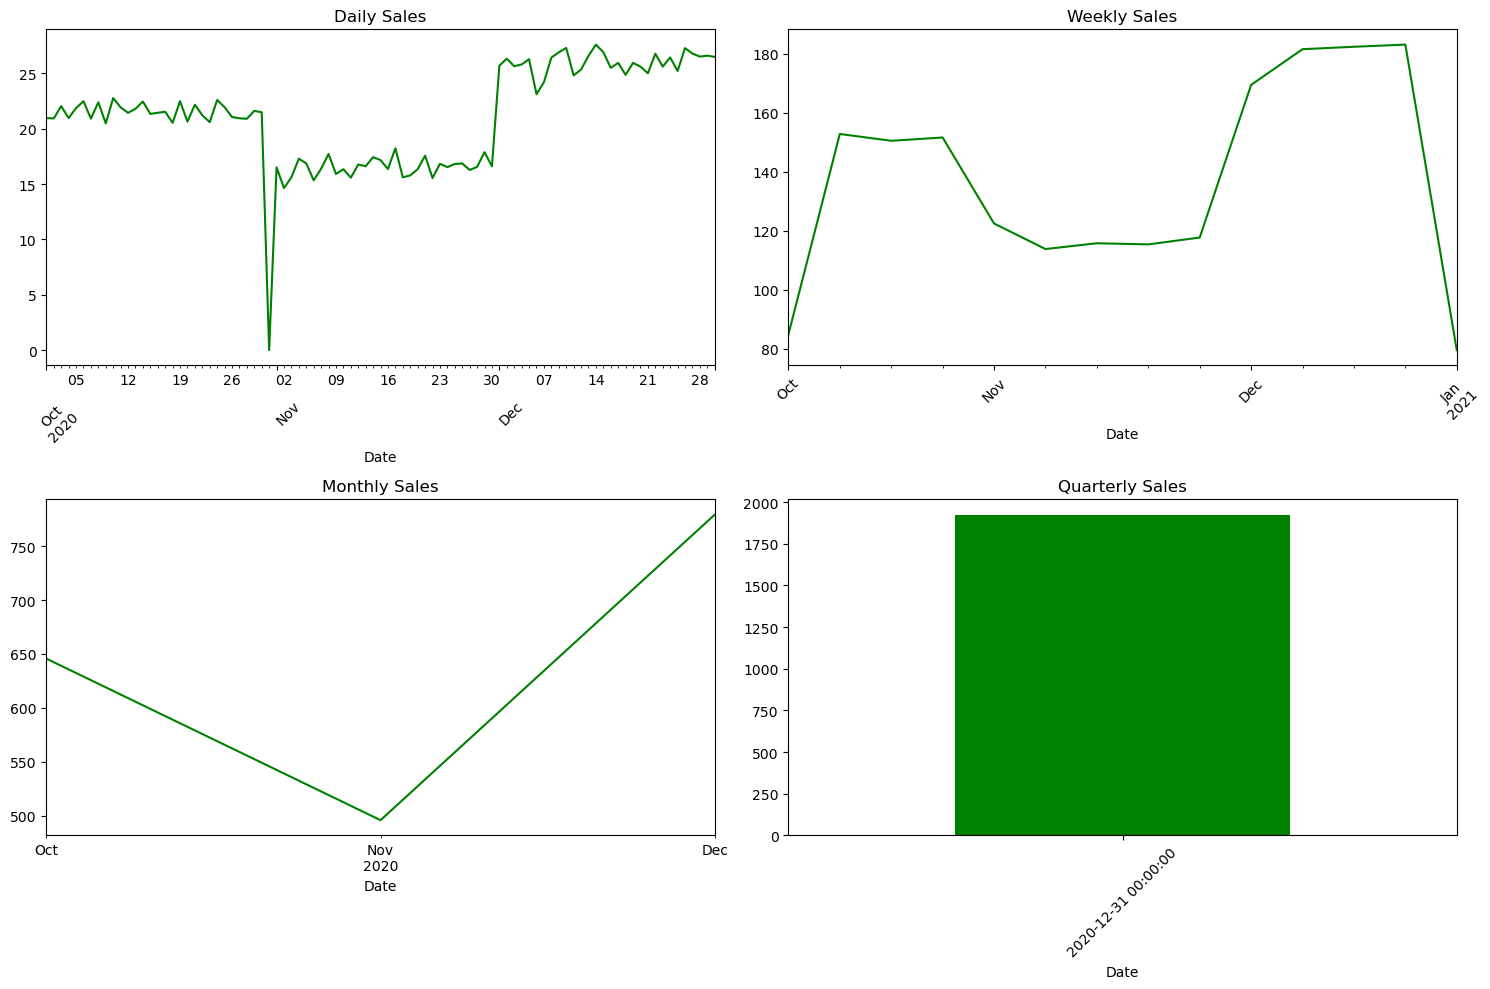

In [28]:
plt.figure(figsize=(15, 10))

# Daily Sales
plt.subplot(2, 2, 1)
df['Sales'].resample('d').sum().plot(kind='line', color='green')
plt.title('Daily Sales')
plt.xticks(rotation=45)

# Weekly Sales
plt.subplot(2, 2, 2)
df['Sales'].resample('w').sum().plot(kind='line', color='green')
plt.title('Weekly Sales')
plt.xticks(rotation=45)


# Monthly Sales
plt.subplot(2, 2, 3)
df['Sales'].resample('m').sum().plot(kind='line', color='green')
plt.title('Monthly Sales')
plt.xticks(rotation=45)


# Quarterly Sales
plt.subplot(2, 2, 4)
df['Sales'].resample('q').sum().plot(kind='bar', color='green')
plt.title('Quarterly Sales')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()